# Basket Analysis

In [2]:
# Bibliotecas requeridas
import sys
sys.path.append('../scr/')

import warnings
warnings.filterwarnings('ignore')

import loadAndTransformData as ltd
import viewDataFunctions as vdf
import basketAnalysis as ba

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [3]:
# Cargar los datos
ruta_archivo = '../data/processed/Minimarket_Sales_Data_Transform_By_Subcategory.csv'
datos = ltd.cargar_csv(ruta_archivo)

# Convertir tipo de datos a bool
datos = ltd.convertir_a_bool(datos)

Archivo cargado correctamente.


In [79]:
# Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.02],
    'confianza_minima': [0.2]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

In [81]:
# Mostrar la mejor configuración para Apriori
print("Mejor configuración Apriori:")
mejor_configuracion_apriori

Mejor configuración Apriori:


{'confianza_minima': 0.2, 'soporte_minimo': 0.02}

In [83]:
# Mostrar frecuencia de items
itemsets_frecuentes_apriori.sort_values(by='support', ascending=False)

,support,itemsets
46,0.232855,(Tissue)
39,0.156915,(Otros)
20,0.149861,(Detergentes)
21,0.142602,(Empaques)
34,0.113667,(Leches Larga Vida)
...,...,...
57,0.020678,"(Lavaplatos, Cuidado De Prendas)"
37,0.020627,(Mortadelas)
26,0.020499,(Gallina)
73,0.020321,"(Esponjas, Tissue)"


In [85]:
# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Blanqueador),(Pisos),0.085832,0.064693,0.027707,0.322811,4.989863,0.022155,1.381161,0.874668
8,(Pisos),(Blanqueador),0.064693,0.085832,0.027707,0.428289,4.989863,0.022155,1.599005,0.854900
62,(Cuidado De Prendas),"(Detergentes, Tissue)",0.078266,0.064182,0.023107,0.295232,4.599903,0.018083,1.327838,0.849056
60,"(Detergentes, Tissue)",(Cuidado De Prendas),0.064182,0.078266,0.023107,0.360016,4.599903,0.018083,1.440245,0.836278
58,(Blanqueador),"(Detergentes, Tissue)",0.085832,0.064182,0.023848,0.277844,4.328988,0.018339,1.295866,0.841201
...,...,...,...,...,...,...,...,...,...,...
37,(Empaques),(Tissue),0.142602,0.232855,0.046801,0.328195,1.409437,0.013596,1.141916,0.338812
44,(Jabonería),(Otros),0.094088,0.156915,0.020678,0.219777,1.400610,0.005915,1.080569,0.315732
35,(Empaques),(Otros),0.142602,0.156915,0.028858,0.202366,1.289651,0.006481,1.056982,0.261951
53,(Otros),(Tissue),0.156915,0.232855,0.042635,0.271705,1.166842,0.006096,1.053344,0.169599


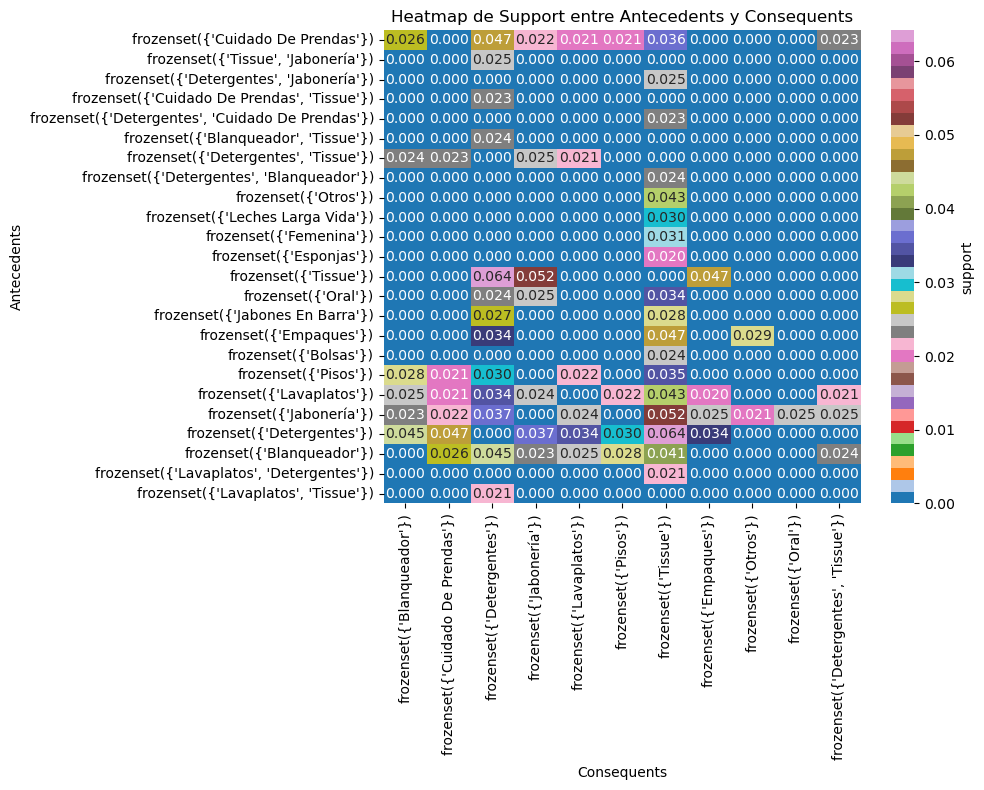

In [87]:
fig=vdf.crear_heatmap_asociacion(mejores_reglas_apriori)

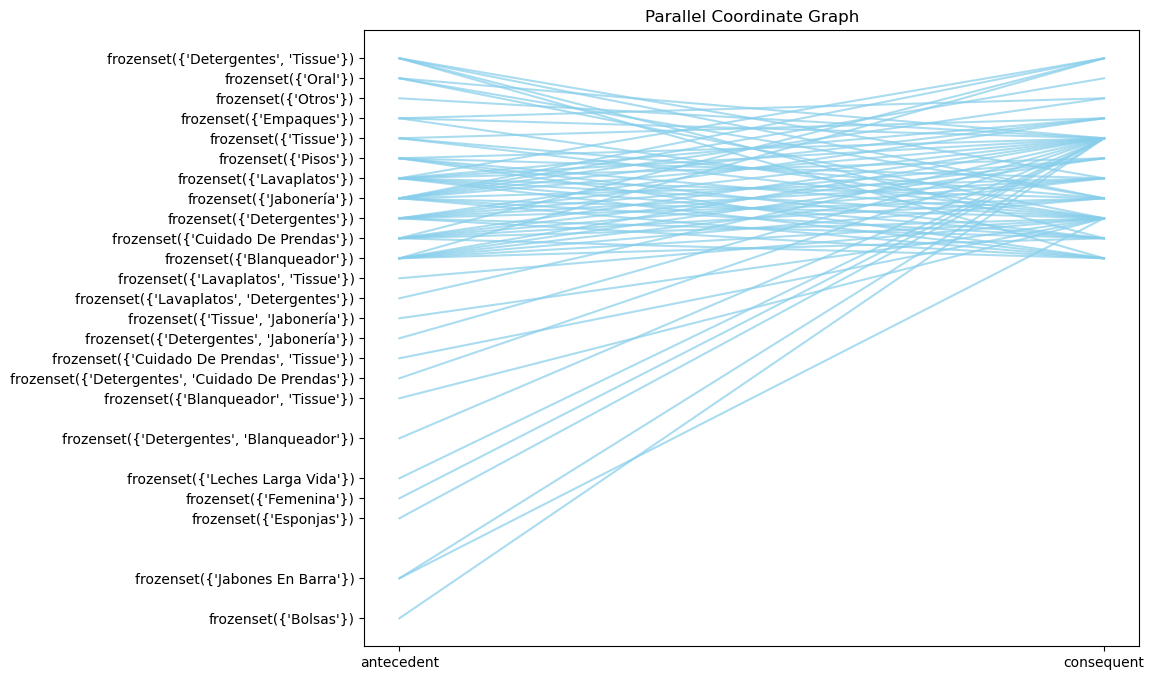

In [89]:
fig = vdf.graficar_coordenadas_paralelas(mejores_reglas_apriori)